#### Census Data Analysis -- Age

In [38]:
# necessary imports

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data
populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')

In [39]:
# selecting relevant columns from overall populationDemographics dataframe
ageOnly = populationDemographics[['geoid','geometry','qualifying name', 'total population', 'total: under 5 years', 'total: 5 to 9 years',
                        'total: 10 to 14 years','total: 15 to 17 years', 'total: 18 and 19 years', 'total: 20 years', 
                       'total: 21 years', 'total: 22 to 24 years', 'total: 25 to 29 years', 'total: 30 to 34 years', 
                       'total: 35 to 39 years', 'total: 40 to 44 years', 'total: 45 to 49 years','total: 50 to 54 years',
                       'total: 55 to 59 years', 'total: 60 and 61 years', 'total: 62 to 64 years', 'total: 65 and 66 years', 
                       'total: 67 to 69 years', 'total: 70 to 74 years', 'total: 75 to 79 years', 'total: 80 to 84 years',
                       'total: 85 years and over']]

The following cell plots a heat map of the percent of each community that is retirement age or above

Text(0.5, 1.0, 'Estimate Percent Retired per Census Tract')

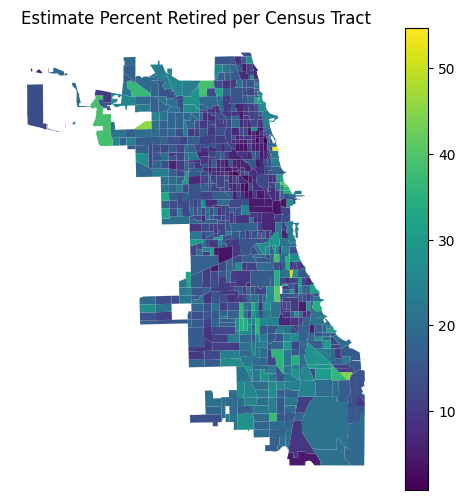

In [40]:
# this line makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
retiredAgeOnly = ageOnly.copy(deep = True)

# this line calculates the percent of each census tract that is of retirement age and appends a column with those values to the data frame
retiredAgeOnly['percent at retirement age'] = ((ageOnly['total: 62 to 64 years']+ageOnly['total: 65 and 66 years']
                                           +ageOnly['total: 67 to 69 years']
                                           +ageOnly['total: 70 to 74 years']+ageOnly['total: 75 to 79 years']+ageOnly['total: 80 to 84 years']
                                           +ageOnly['total: 85 years and over'])/ageOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of retired members of each community
retiredAgeOnly = gpd.GeoDataFrame(
    retiredAgeOnly.loc[:, [c for c in retiredAgeOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(retiredAgeOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
retiredAgeOnly.plot(column='percent at retirement age', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Estimate Percent Retired per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})


The proportion of retired adults in Chicago seems to be fairly even across Chicago with a lower concentration in the north east. 

The following cell plots a heat map of the percent of each community that is minors.

Text(0.5, 1.0, 'Percent Minors per Census Tract')

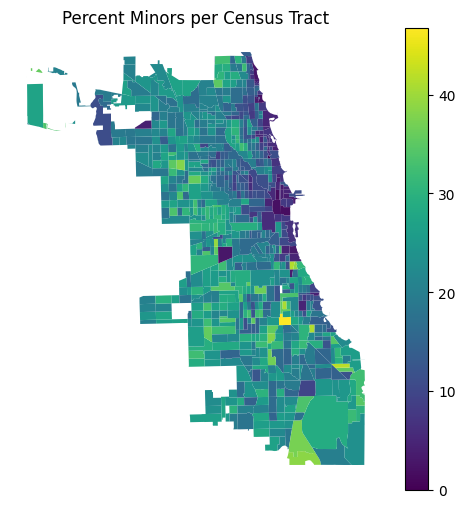

In [41]:
# this cell makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
youthAgeOnly = ageOnly.copy(deep = True)

# this cell calculates the percent of each census tract that is under 18 and appends a column with those values to the data frame
youthAgeOnly['percent under eighteen'] = ((youthAgeOnly['total: under 5 years']+youthAgeOnly['total: 5 to 9 years']
                                           +youthAgeOnly['total: 10 to 14 years']+youthAgeOnly['total: 15 to 17 years'])
                                             /youthAgeOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of minors in each community
youthAgeOnly = gpd.GeoDataFrame(
    youthAgeOnly.loc[:, [c for c in youthAgeOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(youthAgeOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
youthAgeOnly.plot(column='percent under eighteen', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Minors per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

There is no clear pattern visible other than most people in the Loop and living along the north side of the lakefront are adults. This likely refers to working adults.

In the data set, most age data is given in increments of 5 but some specific ages are listed individually or in pairs. In the folliwng cell, I go through and combine those ages into groups of 5 to follow the increments. This would allow me to generate a more accurate plot if I was trying to group by age. I would only need to make those groupings if making a distribution or barplot across all ages. 

/tmp/ipykernel_1211369/3811550669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageDistribution['total: 15 to 17 years'] = ageDistribution['total: 15 to 17 years']+ageDistribution['total: 18 and 19 years']


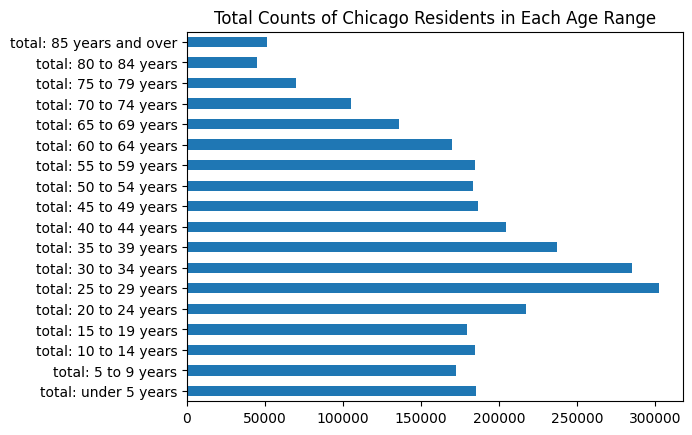

In [46]:
ageDistribution = ageOnly[['total: under 5 years', 'total: 5 to 9 years',
                        'total: 10 to 14 years','total: 15 to 17 years', 'total: 18 and 19 years', 'total: 20 years', 
                       'total: 21 years', 'total: 22 to 24 years', 'total: 25 to 29 years', 'total: 30 to 34 years', 
                       'total: 35 to 39 years', 'total: 40 to 44 years', 'total: 45 to 49 years','total: 50 to 54 years',
                       'total: 55 to 59 years', 'total: 60 and 61 years', 'total: 62 to 64 years', 'total: 65 and 66 years', 
                       'total: 67 to 69 years', 'total: 70 to 74 years', 'total: 75 to 79 years', 'total: 80 to 84 years',
                       'total: 85 years and over']]

# combining ages 15-17 with ages 18-19 because in general, data is given in sets of 5 years
ageDistribution['total: 15 to 17 years'] = ageDistribution['total: 15 to 17 years']+ageDistribution['total: 18 and 19 years']
ageDistribution = ageDistribution.rename(columns={'total: 15 to 17 years': 'total: 15 to 19 years'})
ageDistribution = ageDistribution.drop(columns = 'total: 18 and 19 years')

# combining ages 20, 21 with ages 22-24 because in general, data is given in sets of 5 years
ageDistribution['total: 20 years'] = ageDistribution['total: 20 years']+ageDistribution['total: 21 years']+ageDistribution['total: 22 to 24 years']
ageDistribution = ageDistribution.rename(columns={'total: 20 years': 'total: 20 to 24 years'})
ageDistribution = ageDistribution.drop(columns = ['total: 21 years', 'total: 22 to 24 years'])

# combining ages 60 and 61 with ages 62-64 because in general, data is given in sets of 5 years
ageDistribution['total: 60 and 61 years'] = ageDistribution['total: 60 and 61 years']+ageDistribution['total: 62 to 64 years']
ageDistribution = ageDistribution.rename(columns={'total: 60 and 61 years': 'total: 60 to 64 years'})
ageDistribution = ageDistribution.drop(columns = 'total: 62 to 64 years')

# combining ages 65 and 66 with ages 67-69 because in general, data is given in sets of 5 years
ageDistribution['total: 65 and 66 years'] = ageDistribution['total: 65 and 66 years']+ageDistribution['total: 67 to 69 years']
ageDistribution = ageDistribution.rename(columns={'total: 65 and 66 years': 'total: 65 to 69 years'})
ageDistribution = ageDistribution.drop(columns = 'total: 67 to 69 years')

# summed the number of residents in each age group to generate a bar plot of the total age breakdown in Chicago
countsByAge=ageDistribution.sum(axis='rows')
countsByAge.plot(kind = 'barh', title = 'Total Counts of Chicago Residents in Each Age Range')
plt.show()